# HM1: Logistic Regression.

### Name: SANJEET VINDO JAIN
### CWID: 20012768


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also, you should plot their objective values versus epochs and compare their training and testing accuracy. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [1795]:
# Load Packages
import pandas as pd
import numpy as np 
np.random.seed(12)
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [1796]:
df_breast_cancer = pd.read_csv("data.csv")

## 1.2 Examine and clean data

In [1797]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 

df_breast_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [1798]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [1799]:

print(df_breast_cancer[df_breast_cancer.duplicated()])
print(df_breast_cancer.shape)

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst, Unnamed: 32]
Index: []

[0 rows x 33 columns]
(569, 33)


In [1800]:
# You need to get rid of the ID number feature.

df_breast_cancer_cleaned = df_breast_cancer.drop(columns=['Unnamed: 32',"id"])
df_breast_cancer_cleaned.dropna()
print(df_breast_cancer_cleaned.shape)

(569, 31)


In [1801]:
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.
df_breast_cancer_cleaned.replace({"M":-1, "B":1},inplace=True)
df_breast_cancer_cleaned

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,-1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,-1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,-1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 1.3. Partition to training and testing sets

In [1802]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machine learning.
#  predict whether the cancer is malignant or benignon the patients.
X = df_breast_cancer_cleaned.drop(columns=["diagnosis"]).to_numpy()
y = df_breast_cancer_cleaned["diagnosis"].to_numpy().reshape(-1,1)
x_train, x_test, y_train, y_test =  train_test_split(X,y,random_state=12,train_size=0.8,test_size=0.2)


## 1.4. Feature scaling

Use the standardization to transform both training and test features

In [1803]:
# Standardization
import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0).reshape(1, d)
sig = numpy.std(x_train, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

test mean = 
[ 0.03720784 -0.08455647  0.04672067  0.04466522  0.08147683  0.14940348
  0.07034102  0.1021201   0.11936167  0.07839179  0.12105034  0.05727219
  0.17145124  0.11078521  0.0382105   0.01800087 -0.05925311  0.02773315
  0.21889937 -0.0503743   0.02921238 -0.04797916  0.04415536  0.02188255
  0.09668508  0.08661625  0.03434341  0.07705448  0.17774478  0.05883079]
test std = 
[1.07037196 0.80439963 1.08002843 1.07822936 1.07421755 1.23984499
 1.06251509 1.06346437 0.98405363 1.16011594 1.3263379  0.9664811
 1.43480303 1.3772373  0.83797498 1.09280662 0.72582796 1.02021938
 1.36370692 0.77157179 1.02486511 0.85984296 1.045251   0.98231599
 0.95504669 1.16180697 1.03919533 1.07810222 1.36324608 1.16071511]


# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistic regression and when $\lambda > 0$, it essentially becomes a regularized logistic regression.

In [1804]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):
    yxw = np.dot(np.multiply(y,x),w)
    expTerm = np.exp(-yxw)
    innerTerm = np.log(1+expTerm)
    result =np.mean(innerTerm) + (lam/2)*(np.sum(w*w))
    return result

# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [1805]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    yx = np.multiply(y,x)
    expterm = np.exp(np.dot(yx,w))
    innerterm = np.divide(yx,1+expterm)
    g = -np.mean(innerterm,axis= 0).reshape(d,1) + lam*w
    return g

In [1806]:
# Gradient descent for solving logistic regression
# You will need to do iterative processes (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    # array to store object value from each epoch
    objvals = np.zeros(max_epoch)

    for i in range(0,max_epoch):
        currObjective = objective(w,x,y,lam)
        currGradient = gradient(w,x,y,lam)
        w -= learning_rate*currGradient
        objvals[i] = currObjective
        print(f"iteration Number {i+1},  current objective value {objvals[i]}")

    return w, objvals
    

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [1807]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0
learning_rate = 1
#initialise weight to 0s
w = np.zeros((d,1))
w_gd, objvals_gd = gradient_descent(x_train, y_train, lam, learning_rate, w)

iteration Number 1,  current objective value 0.6931471805599453
iteration Number 2,  current objective value 0.16961716311205735
iteration Number 3,  current objective value 0.1329009229840668
iteration Number 4,  current objective value 0.11775139566638068
iteration Number 5,  current objective value 0.1109103344375535
iteration Number 6,  current objective value 0.10615131340205236
iteration Number 7,  current objective value 0.10228850785013686
iteration Number 8,  current objective value 0.0989980379623545
iteration Number 9,  current objective value 0.09613030578196698
iteration Number 10,  current objective value 0.09359452691494419
iteration Number 11,  current objective value 0.09132793646282408
iteration Number 12,  current objective value 0.0892841932818116
iteration Number 13,  current objective value 0.0874277692935565
iteration Number 14,  current objective value 0.08573074210824866
iteration Number 15,  current objective value 0.08417076112236843
iteration Number 16,  cur

In [1808]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.000001
learning_rate = 1
w = np.zeros((d,1))
w_gd_r, objvals_gdr = gradient_descent(x_train, y_train, lam, learning_rate, w)

iteration Number 1,  current objective value 0.6931471805599453
iteration Number 2,  current objective value 0.16961815020397833
iteration Number 3,  current objective value 0.13290201180231634
iteration Number 4,  current objective value 0.11775265881648658
iteration Number 5,  current objective value 0.11091175965557111
iteration Number 6,  current objective value 0.10615288266232346
iteration Number 7,  current objective value 0.1022902097887433
iteration Number 8,  current objective value 0.09899986426943551
iteration Number 9,  current objective value 0.0961322499222489
iteration Number 10,  current objective value 0.09359658351709495
iteration Number 11,  current objective value 0.09133010097817994
iteration Number 12,  current objective value 0.08928646177533293
iteration Number 13,  current objective value 0.08743013830671445
iteration Number 14,  current objective value 0.08573320856403077
iteration Number 15,  current objective value 0.0841733222564938
iteration Number 16,  c

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [1809]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    yx = np.multiply(yi,xi)
    yxw = float(np.dot(yx,w))
    expTerm1 = np.exp(-yxw)
    logTerm = np.log(1+expTerm1)
    obj = logTerm + (lam/2)*np.sum(w*w)
    expTerm2 = np.exp(yxw)
    g = np.divide(-yx.T,1+expTerm2) + lam*w
    return obj,g

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [1810]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=100):
    objvals = np.zeros(max_epoch)
    n= x.shape[0]
    for i in range(0,max_epoch):
        # shuffling 
        randomIndices = np.random.permutation(n)
        x_random, y_random = x[randomIndices, :], y[randomIndices, :]
        currentObjValue = 0
        for j in range(0,n):
            xi,yi = x_random[j,:].reshape(1,d),y_random[j,:]
            currObj_at_j, gt_at_j = stochastic_objective_gradient(w,xi,yi,lam)
            w -= learning_rate*gt_at_j
            currentObjValue+= currObj_at_j
        
        learning_rate *= 0.95
        objvals[i]= currentObjValue/n
        print(f'Iteration number: {i+1} Current Objective Value: {objvals[i]}')
    return w, objvals
    

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [1811]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0
learning_rate = 1
w = np.zeros((d,1))
w_sgd, objvals_sgd = sgd(x_train, y_train, lam, learning_rate, w)

Iteration number: 1 Current Objective Value: 0.5664045028014058
Iteration number: 2 Current Objective Value: 0.1359639016605426
Iteration number: 3 Current Objective Value: 0.2567682249969351
Iteration number: 4 Current Objective Value: 0.1306986098307533
Iteration number: 5 Current Objective Value: 0.10558422859913673
Iteration number: 6 Current Objective Value: 0.13636936513175932
Iteration number: 7 Current Objective Value: 0.2060123192112903
Iteration number: 8 Current Objective Value: 0.0694061122113197
Iteration number: 9 Current Objective Value: 0.15789449698830943
Iteration number: 10 Current Objective Value: 0.10418479125852333
Iteration number: 11 Current Objective Value: 0.12478448455272247
Iteration number: 12 Current Objective Value: 0.1009547690145062
Iteration number: 13 Current Objective Value: 0.07426289913708826
Iteration number: 14 Current Objective Value: 0.04521796953614952
Iteration number: 15 Current Objective Value: 0.06884411273118318
Iteration number: 16 Curre

In [1812]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.000001
learning_rate = 1
w = np.zeros((d,1))
w_sgd_r, objvals_sgdr = sgd(x_train, y_train, lam, learning_rate, w)

Iteration number: 1 Current Objective Value: 0.49757059466489595
Iteration number: 2 Current Objective Value: 0.3064284699449511
Iteration number: 3 Current Objective Value: 0.22638229392234918
Iteration number: 4 Current Objective Value: 0.14867936337595122
Iteration number: 5 Current Objective Value: 0.13280566208369524
Iteration number: 6 Current Objective Value: 0.13453632092973
Iteration number: 7 Current Objective Value: 0.11025330652554499
Iteration number: 8 Current Objective Value: 0.20033037077912638
Iteration number: 9 Current Objective Value: 0.08306420697377867
Iteration number: 10 Current Objective Value: 0.10400598771946953
Iteration number: 11 Current Objective Value: 0.060308527190450746
Iteration number: 12 Current Objective Value: 0.10343430554794973
Iteration number: 13 Current Objective Value: 0.07220741394534101
Iteration number: 14 Current Objective Value: 0.08109092374437925
Iteration number: 15 Current Objective Value: 0.07033288437710336
Iteration number: 16 C

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [1813]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    yx = np.multiply(yi,xi)
    yxw = np.dot(yx,w)
    expTerm1 = np.exp(-yxw)
    logTerm = np.log(1+expTerm1)
    obj = np.mean(logTerm) + (lam/2)*np.sum(w*w)
    expTerm2 = np.exp(yxw)
    g = np.mean( np.divide(-yx,1+expTerm2),axis = 0).reshape(d,1)+lam*w
    return obj,g

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [1814]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100):
    batchsize = 10 
    objvals = np.zeros(max_epoch)
    n = x.shape[0]
    # epoch loop 
    for i in range(max_epoch):
        # shuffling 
        randomIndices = np.random.permutation(n)
        x_random, y_random = x[randomIndices, :], y[randomIndices, :]
        currentObjValue = 0
        for j in range(0,n,batchsize):
            xi,yi = x_random[j:j+batchsize,:],y_random[j:j+batchsize,:]
            currObj_at_j, gt_at_j = mb_objective_gradient(w,xi,yi,lam)
            w -= learning_rate*gt_at_j
            currentObjValue+= currObj_at_j
        
        learning_rate *= 0.95
        objvals[i]= currentObjValue/(n/batchsize)
        print(f'Iteration number: {i+1} Current Objective Value: {objvals[i]}')
    return w, objvals
    
        

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [1815]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0
learning_rate = 1
w = np.zeros((d,1))
w_mbgd, objvals_mbgd = mbgd(x_train, y_train, lam, learning_rate, w)

Iteration number: 1 Current Objective Value: 0.14433674718150732
Iteration number: 2 Current Objective Value: 0.0682652319915624
Iteration number: 3 Current Objective Value: 0.05864559254172856
Iteration number: 4 Current Objective Value: 0.05027898174071755
Iteration number: 5 Current Objective Value: 0.049610212766799854
Iteration number: 6 Current Objective Value: 0.04609139973430187
Iteration number: 7 Current Objective Value: 0.045362511866381204
Iteration number: 8 Current Objective Value: 0.041245660223160015
Iteration number: 9 Current Objective Value: 0.04110907984038828
Iteration number: 10 Current Objective Value: 0.03848710181766851
Iteration number: 11 Current Objective Value: 0.038622941042252536
Iteration number: 12 Current Objective Value: 0.03739097814980853
Iteration number: 13 Current Objective Value: 0.0371738371687808
Iteration number: 14 Current Objective Value: 0.03668845156772256
Iteration number: 15 Current Objective Value: 0.036789169130407716
Iteration number

In [1816]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.000001
learning_rate = 1
w = np.zeros((d,1))
w_mbgd_r, objvals_mbgdr = mbgd(x_train, y_train, lam, learning_rate, w)

Iteration number: 1 Current Objective Value: 0.10648371135560084
Iteration number: 2 Current Objective Value: 0.06058848061030009
Iteration number: 3 Current Objective Value: 0.05489916678696853
Iteration number: 4 Current Objective Value: 0.05646697376748213
Iteration number: 5 Current Objective Value: 0.04636505115512343
Iteration number: 6 Current Objective Value: 0.04858277984016825
Iteration number: 7 Current Objective Value: 0.042186126388827225
Iteration number: 8 Current Objective Value: 0.04244842391065153
Iteration number: 9 Current Objective Value: 0.041589865955930845
Iteration number: 10 Current Objective Value: 0.04112187512170181
Iteration number: 11 Current Objective Value: 0.03882802291495875
Iteration number: 12 Current Objective Value: 0.038471032032591626
Iteration number: 13 Current Objective Value: 0.04592137600854391
Iteration number: 14 Current Objective Value: 0.03842677816350039
Iteration number: 15 Current Objective Value: 0.03589563268423542
Iteration number

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

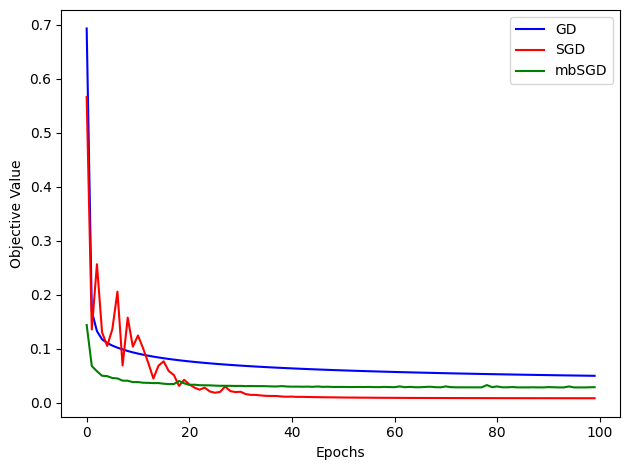

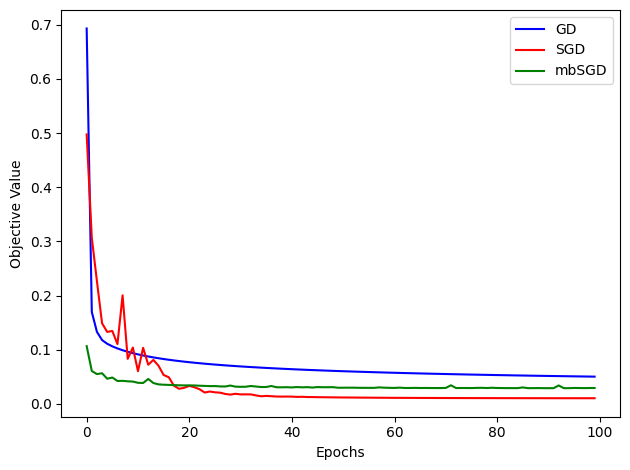

In [1817]:
import matplotlib.pyplot as plt
%matplotlib inline
max_epoch = 100

line0, = plt.plot(range(0,max_epoch), objvals_gd, '-b')
line1, = plt.plot(range(0,max_epoch), objvals_sgd, '-r')
line2, = plt.plot(range(0,max_epoch), objvals_mbgd, '-g')

plt.ylabel('Objective Value')
plt.xlabel('Epochs')
plt.legend([line0, line1, line2], ['GD', 'SGD', 'mbSGD'], fontsize=10)
plt.tight_layout()
plt.show()

line0, = plt.plot(range(0,max_epoch), objvals_gdr, '-b')
line1, = plt.plot(range(0,max_epoch), objvals_sgdr, '-r')
line2, = plt.plot(range(0,max_epoch), objvals_mbgdr, '-g')

plt.ylabel('Objective Value')
plt.xlabel('Epochs')
plt.legend([line0, line1, line2], ['GD', 'SGD', 'mbSGD'], fontsize=10)
plt.tight_layout()
plt.show()

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [1818]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    f = np.sign(np.dot(X,w))
    return np.asarray(f)

In [1819]:
# evaluate training error of logistic regression and regularized version
# Gradient Descent
f_train_gd = predict(w_gd, x_train)
diff = numpy.abs(f_train_gd - y_train) / 2
error_train_gd = numpy.mean(diff)
print('Training classification error for classic Gradient Descent is ' + str(error_train_gd))

# Stochastic Gradient Descent
f_train_sgd = predict(w_sgd, x_train)
diff = numpy.abs(f_train_sgd - y_train) / 2
error_train_sgd = numpy.mean(diff)
print('Training classification error for classic Stochastic Gradient Descent is ' + str(error_train_sgd))

# Mini-Batch Gradient Descent 
f_train_mbgd = predict(w_mbgd, x_train)
diff = numpy.abs(f_train_mbgd - y_train) / 2
error_train_mbgd = numpy.mean(diff)
print('Training classification error for Mini-Batch Gradient Descent is ' + str(error_train_mbgd))

# Gradient Descent regularized
f_train_gd_r = predict(w_gd_r, x_train)
diff = numpy.abs(f_train_gd_r - y_train) / 2
error_train_gd_r = numpy.mean(diff)
print('Training classification error for classic Gradient Descent regularized is ' + str(error_train_gd_r))

# Stochastic Gradient Descent regularized
f_train_sgd_r = predict(w_sgd_r, x_train)
diff = numpy.abs(f_train_sgd_r - y_train) / 2
error_train_sgd_r = numpy.mean(diff)
print('Training classification error for Stochastic Gradient Descent regularized is ' + str(error_train_sgd_r))

# Mini-Batch Gradient Descent regularized
f_train_mbgd_r = predict(w_mbgd_r, x_train)
diff = numpy.abs(f_train_mbgd_r - y_train) / 2
error_train_mbgd_r = numpy.mean(diff)
print('Training classification error for Mini-Batch Gradient Descent regularized is ' + str(error_train_mbgd) )


Training classification error for classic Gradient Descent is 0.013186813186813187
Training classification error for classic Stochastic Gradient Descent is 0.002197802197802198
Training classification error for Mini-Batch Gradient Descent is 0.008791208791208791
Training classification error for classic Gradient Descent regularized is 0.013186813186813187
Training classification error for Stochastic Gradient Descent regularized is 0.004395604395604396
Training classification error for Mini-Batch Gradient Descent regularized is 0.008791208791208791


In [1820]:
# evaluate testing error of logistic regression and regularized version
# Gradient Descent
f_test_gd = predict(w_gd, x_test)
diff = numpy.abs(f_test_gd - y_test) / 2
error_test_gd = numpy.mean(diff)
print('testing classification error for classic Gradient Descent is ' + str(error_test_gd))

# Stochastic Gradient Descent
f_test_sgd = predict(w_sgd, x_test)
diff = numpy.abs(f_test_sgd - y_test) / 2
error_test_sgd = numpy.mean(diff)
print('testing classification error for classic Stochastic Gradient Descent is ' + str(error_test_sgd))

# Mini-Batch Gradient Descent 
f_test_mbgd = predict(w_mbgd, x_test)
diff = numpy.abs(f_test_mbgd - y_test) / 2
error_test_mbgd = numpy.mean(diff)
print('testing classification error for Mini-Batch Gradient Descent is ' + str(error_test_mbgd))

# Gradient Descent regularized
f_test_gd_r = predict(w_gd_r, x_test)
diff = numpy.abs(f_test_gd_r - y_test) / 2
error_test_gd_r = numpy.mean(diff)
print('testing classification error for classic Gradient Descent regularized is ' + str(error_test_gd_r))

# Stochastic Gradient Descent regularized
f_test_sgd_r = predict(w_sgd_r, x_test)
diff = numpy.abs(f_test_sgd_r - y_test) / 2
error_test_sgd_r = numpy.mean(diff)
print('testing classification error for Stochastic Gradient Descent regularized is ' + str(error_test_sgd_r))

# Mini-Batch Gradient Descent regularized
f_test_mbgd_r = predict(w_mbgd_r, x_test)
diff = numpy.abs(f_test_mbgd_r - y_test) / 2
error_test_mbgd_r = numpy.mean(diff)
print('testing classification error for Mini-Batch Gradient Descent regularized is ' + str(error_test_mbgd) )

testing classification error for classic Gradient Descent is 0.017543859649122806
testing classification error for classic Stochastic Gradient Descent is 0.03508771929824561
testing classification error for Mini-Batch Gradient Descent is 0.02631578947368421
testing classification error for classic Gradient Descent regularized is 0.017543859649122806
testing classification error for Stochastic Gradient Descent regularized is 0.03508771929824561
testing classification error for Mini-Batch Gradient Descent regularized is 0.02631578947368421


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

In [1821]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, f_test_gd).ravel()
accuracy = ((tn+tp)/(tn+ fp+ fn+ tp))
print("f_test_gd accuracy",accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, f_test_gd_r).ravel()
accuracy = ((tn+tp)/(tn+ fp+ fn+ tp))
print("f_test_gd_r accuracy",accuracy)



tn, fp, fn, tp = confusion_matrix(y_test, f_test_sgd).ravel()
accuracy = ((tn+tp)/(tn+ fp+ fn+ tp))
print("f_test_sgd accuracy",accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, f_test_sgd_r).ravel()
accuracy = ((tn+tp)/(tn+ fp+ fn+ tp))
print("f_test_sgd_r accuracy",accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, f_test_mbgd).ravel()
accuracy = ((tn+tp)/(tn+ fp+ fn+ tp))
print("f_test_mbgd accuracy",accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, f_test_mbgd_r).ravel()
accuracy = ((tn+tp)/(tn+ fp+ fn+ tp))
print("f_test_mbgd_r accuracy",accuracy)


f_test_gd accuracy 0.9824561403508771
f_test_gd_r accuracy 0.9824561403508771
f_test_sgd accuracy 0.9649122807017544
f_test_sgd_r accuracy 0.9649122807017544
f_test_mbgd accuracy 0.9736842105263158
f_test_mbgd_r accuracy 0.9736842105263158


In [1822]:
# now lets try to see if accuracy improves by changing learning rate and lambda

# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.01
learning_rate = 1
w = np.zeros((d,1))
w_sgd_r2, objvals_sgdr2 = sgd(x_train, y_train, lam, learning_rate, w)



Iteration number: 1 Current Objective Value: 0.44808114818614686
Iteration number: 2 Current Objective Value: 0.7563942637577326
Iteration number: 3 Current Objective Value: 0.4722418912965847
Iteration number: 4 Current Objective Value: 0.40340349549897947
Iteration number: 5 Current Objective Value: 0.655364138357916
Iteration number: 6 Current Objective Value: 0.3722806472571292
Iteration number: 7 Current Objective Value: 0.3945203807824733
Iteration number: 8 Current Objective Value: 0.38868450948641897
Iteration number: 9 Current Objective Value: 0.2976594460655338
Iteration number: 10 Current Objective Value: 0.3854766796834421
Iteration number: 11 Current Objective Value: 0.24194189660415047
Iteration number: 12 Current Objective Value: 0.2651208676054782
Iteration number: 13 Current Objective Value: 0.30897089955727536
Iteration number: 14 Current Objective Value: 0.18411150614526123
Iteration number: 15 Current Objective Value: 0.36689030941886264
Iteration number: 16 Current

In [1823]:
f_test_sgd_r = predict(w_sgd_r, x_test)

tn, fp, fn, tp = confusion_matrix(y_test, f_test_sgd_r).ravel()
accuracy = ((tn+tp)/(tn+ fp+ fn+ tp))
print(f'f_test_sgd_r accuracy for lambda {lam} and learningRate {learning_rate} : {accuracy}')

f_test_sgd_r accuracy for lambda 0.01 and learningRate 1 : 0.9649122807017544


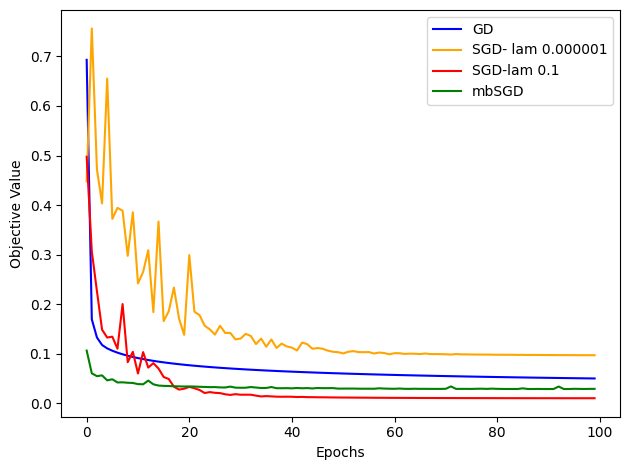

In [1824]:
import matplotlib.pyplot as plt
%matplotlib inline
max_epoch = 100


line0, = plt.plot(range(0,max_epoch), objvals_gdr, '-b')
line1, = plt.plot(range(0,max_epoch), objvals_sgdr2, color='orange')
line2, = plt.plot(range(0,max_epoch), objvals_sgdr, '-r')
line3, = plt.plot(range(0,max_epoch), objvals_mbgdr, '-g')

plt.ylabel('Objective Value')
plt.xlabel('Epochs')
plt.legend([line0, line1, line2, line3], ['GD', 'SGD- lam 0.000001','SGD-lam 0.1', 'mbSGD'], fontsize=10)
plt.tight_layout()
plt.show()

A smoother decreasing line with less spikes on the graph indicates that the optimization process is proceeding in a relatively stable and consistent manner, where the updates to the parameters are consistently moving in a direction that is decreasing the objective function.

On the other hand, a spiky line indicates that the optimization process is more unstable, and the updates to the parameters are more volatile. This may suggest that the learning rate is too high, causing the optimization to overshoot the minimum and then oscillate around it, rather than converging smoothly.